## PANDAS GROUPBY ON HURRICANE DATA!
### On this assignment, you'll be exploring hurricane data, collected globally, since 1842.
### Specifically, you'll be utilizing groupby tools in Pandas to answer some interesting scientific questions about these hurricane events!

### Things you should know about data
- additional documentation here on the specific columns: https://www.ncei.noaa.gov/sites/default/files/2021-07/IBTrACS_v04_column_documentation.pdf
<br><br>
- **SID**: storm identifier - for some Qs, but not all, you'll need to group by SID, as there are often multiple observations collected for the same event, over time, as the hurricane evolves
<br><br>
- **SEASON**: the hurricane season, expressed as year, when the event occurred
<br><br>
- **BASIN**:  the ocean basin the event occured in
  - NA - North Atlantic
  - EP - Eastern North Pacific
  - WP - Western North Pacific
  - NI - North Indian
  - SI - South Indian
  - SP - Southern Pacific
  - SA - South Atlantic
<br><br>
- **NAME**:  the name of the hurricane
<br><br>
- **ISO_TIME**: time, as YYYY-MM-DD HH:mm:ss (in UTC)
<br><br>
- **LAT, LON**: as usual
<br><br>
- **WMO_WIND**: maximum sustained wind speed observation (in knots) - **stronger winds = stronger hurricane**
<br><br>
- **WMO_PRES**: minimum central pressure (in mb) - **lower pressure = stronger hurricane**

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm

### (1)  RECOMMEND USING THE DATA FILE I RECENTLY UPLOADED TO MOODLE WITH THIS NOTEBOOK, AS THIS DATA FILE APPARENTLY CONSTANTLY UPDATES IN REAL TIME.  SO IF YOU WANT TO CHECK WITH MY SANITY CHECKS, YOU'LL WANT TO USE THE FILE ON MOODLE, WHICH MY SANITY CHECKS ARE BASED ON.

#### (Data is located at https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/

### (a.) When reading in data, you must convert the time column to datetime64 (either by adding an argument to pd.read_csv, or via a different method you have learned once your data has been read in).  Confirm that you successfully converted the time column to datetime64

### (b.) You must follow these specifications when you read in your data
- we want to read in only the first 12 columns
- we want to skip the SECOND row in the raw csv file
- you must include the following arguments as well to properly handle missing and other types of undesirable data values: 
  - keep_default_na = False
  - na_values=[-999," "]

### (c.) Handling missing values
- do NOT drop rows with missing values though - there may still be valuable information we can use for that given entry
- but DO check how many rows have missing values 

In [5]:
# (a.) + (b.)

# I'll give you some of this

# We can DIRECTLY read CSV files on websites into Pandas - how cool is that?
# Less cool though since this dataset constantly updates so I highly recommend
# You download the version I have uploaded to Moodle
# So you can compare to my 'sanity checks' (final answers) embedded throughout this notebook

# This is how you would directly read this CSV file from the website into Pandas 
# DON'T DO IT THIS WAY TO ENSURE YOU MATCH MY SANITY CHECKS
#data_path = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
#df = pd.read_csv(data_path, YOUR ADDITIONAL ARGUMENTS HERE)

# key that we define the na values properly!                                                        
df = pd.read_csv('/pscratch/sd/d/dbrooks/atms517/ibtracs.ALL.list.v04r00.csv', 
                 header=0,
                 skiprows=[1], # Skip second row
                 usecols=np.arange(0,12,1), # Only keep first 12 cols
                 keep_default_na=False, # Do not use default NaNs
                 na_values=[-999," "] # Recognize -999 and spaces as NaNs
                 )

df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME']) # Convert to datetimes
df['ISO_TIME']

0        1842-10-25 03:00:00
1        1842-10-25 06:00:00
2        1842-10-25 09:00:00
3        1842-10-25 12:00:00
4        1842-10-25 15:00:00
                 ...        
716160   2024-05-27 06:00:00
716161   2024-05-27 09:00:00
716162   2024-05-27 12:00:00
716163   2024-05-27 15:00:00
716164   2024-05-27 18:00:00
Name: ISO_TIME, Length: 716165, dtype: datetime64[ns]

In [6]:
df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NOT_NAMED,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
716160,2024147N19089,2024,27,NI,BB,REMAL,2024-05-27 06:00:00,NR,23.0325,89.3509,NaN,NaN
716161,2024147N19089,2024,27,NI,BB,REMAL,2024-05-27 09:00:00,NR,23.3337,89.6178,NaN,NaN
716162,2024147N19089,2024,27,NI,BB,REMAL,2024-05-27 12:00:00,NR,23.6263,89.8799,NaN,NaN
716163,2024147N19089,2024,27,NI,BB,REMAL,2024-05-27 15:00:00,NR,23.9143,90.1400,NaN,NaN


In [7]:
# (c.)

# Count number of NaNs in each column
print(df.isna().sum())

# Total number of rows with NaN in at least one col
print(df.isnull().any(axis=1).sum())

# Sanity check, # of missing observations 
#WMO_WIND    558595
#WMO_PRES    555890

SID              0
SEASON           0
NUMBER           0
BASIN            0
SUBBASIN         0
NAME             0
ISO_TIME         0
NATURE           0
LAT              0
LON              0
WMO_WIND    558595
WMO_PRES    555890
dtype: int64
603120


### (2) Let's get a feel for our data.
### (a.) First, in a bit more processing - convert wind speed from knots to mph :)
### (b.) How many total observations (so, rows) are in this dataset?
### (c.) How many UNIQUE SID (storm event IDs), are there?  Remember there can be multiple rows (i.e., observations) associated with the same storm ID, so this is something that is useful to evaluate
### (d.) How many (UNIQUE) basins are there? 

In [8]:
# (a.)
df['WMO_WIND'] = df['WMO_WIND']*1.151 # kts to mph

In [9]:
# (b.)

len(df) # Total obs

# Sanity check
# 716165 observations

716165

In [10]:
# (c.)

len(df['SID'].unique()) # Unique storm IDs


# Sanity check
# Collected on 13811 storms

13811

In [11]:
# (d.)

len(df['BASIN'].unique()) # Unique basins


# Sanity check
# 7 unique basins 

7

### (3)  Let's evaluate the strongest hurricanes!
### (a.) What are the NAMES and YEARS (SEASONS) of the 10 strongest hurricanes, based on wind speed?
### (b.) Which hurricane of these is the strongest one of the 10?

*Optional challenge*: 
- create a visualization of your creative choice about these top 8 storms in terms of wind speed (ex: bar plot, locations + wind speed, etc.)

In [12]:
# (a.)  

# Max wind for each storm, grouped by storm ID, name, and season
max_winds = df.groupby(['SID','NAME','SEASON']).agg({'WMO_WIND':'max'})

# Top 10 strongest storms
max_winds.nlargest(columns='WMO_WIND', n=10)




,,,WMO_WIND
SID,NAME,SEASON,
2015293N13266,PATRICIA,2015,212.935
1980214N11330,ALLEN,1980,189.915
1935241N23291,NOT_NAMED,1935,184.160
1988253N12306,GILBERT,1988,184.160
1997253N12255,LINDA,1997,184.160
2005289N18282,WILMA,2005,184.160
2019236N10314,DORIAN,2019,184.160
1998295N12284,MITCH,1998,178.405
2005261N21290,RITA,2005,178.405


In [13]:
# (b.)

# Strongest storm
max_winds.idxmax()



# Sanity check
# Patricia


WMO_WIND    (2015293N13266, PATRICIA, 2015)
dtype: object

Text(0.5, 1.0, 'Top 10 Strongest Hurricanes (By Max Wind Speed) and Their Location at Peak Strength')

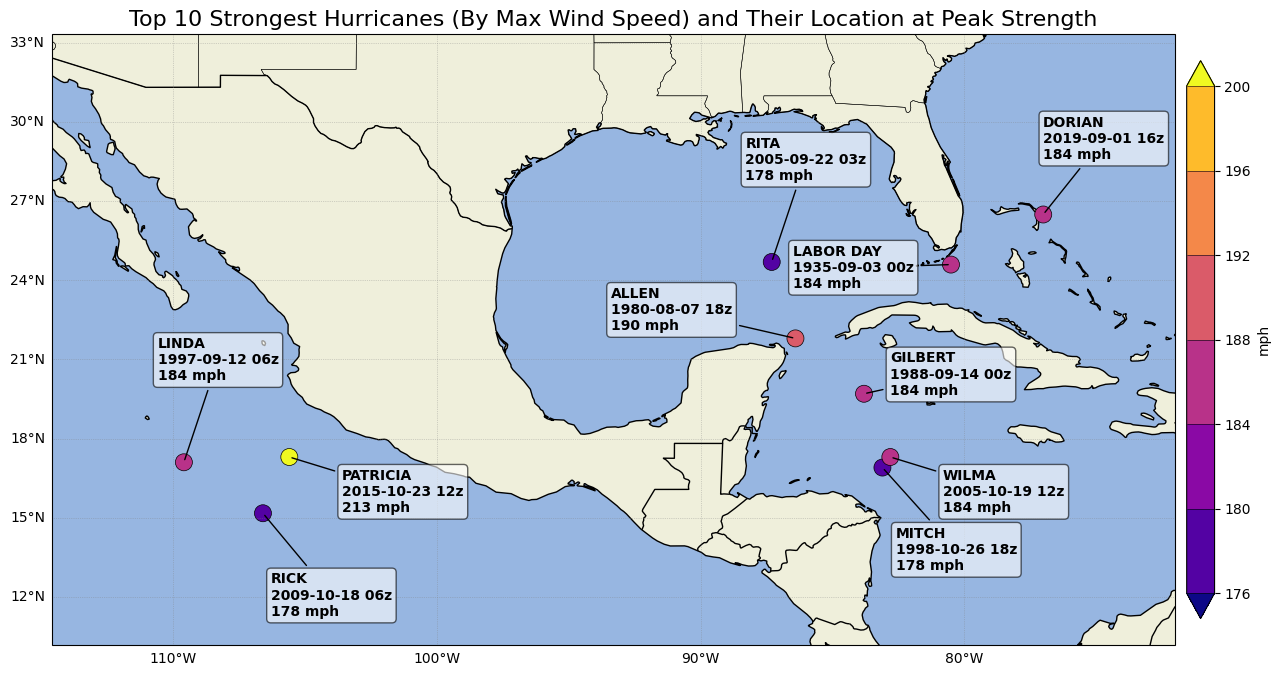

In [14]:
# optional challenge

# Grab storm IDs from the top ten strongest storms
top10 = max_winds.nlargest(columns='WMO_WIND', n=10).index.get_level_values('SID')


# Grab rows for the top 10 storms, groupby storm
# and return the indices for the time of max strength
max_wind_indices = df.loc[df['SID'].isin(top10)].groupby('SID')['WMO_WIND'].idxmax()
max_storms = df.loc[max_wind_indices] # Grab rows of max strength for the top 10 storms


# Scatter plot showing locations of storm at their maximum strength
fig, ax = plt.subplots(figsize=(15,10), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent([max_storms['LON'].min()-5,
               max_storms['LON'].max()+5,
               max_storms['LAT'].min()-5,
               max_storms['LAT'].max()+5,])

# Colormapping
levels = np.arange(176,201,4)
cmap1 = plt.get_cmap('plasma')
norm1 = BoundaryNorm(levels, ncolors=cmap1.N, extend='both') # Get discrete colormap

cb = ax.scatter(max_storms['LON'], max_storms['LAT'], c=max_storms['WMO_WIND'],
                s=150, linewidths=0.5, edgecolors='black', 
                cmap=cmap1, norm=norm1, transform=ccrs.PlateCarree(), zorder=2)

cbar = plt.colorbar(cb, ax=ax, orientation='vertical',
                    fraction=0.024, pad=0.01, extend='both', 
                    drawedges=True)
cbar.set_label('mph')

# Dictionary containing annotation offsets (dx, dy),
# adjustable for each storm. This is to more evenly space
# the text labels between one another.
annotation_offsets = {
    "ALLEN": (-7, 0.2),
    "GILBERT": (1, -0.15),
    "MITCH": (0.5, -4),
    "RITA": (-1, 3),
    "WILMA": (2, -2.2),
    "PATRICIA": (2, -2.2),
    "RICK": (0.3, -4),
    "LINDA": (-1, 3),
    "NOT_NAMED": (-6, -1),
    "DORIAN": (0, 2),
    
}

default_offset = (0.4, 0.0)  # Used if storm not in dict

# Loop through storms and annotate
for index, row in max_storms.iterrows():
    lon, lat = row["LON"], row["LAT"]
    ws, name, time = row["WMO_WIND"], row["NAME"], row["ISO_TIME"]

    # Get storm specific offset or default
    dx, dy = annotation_offsets.get(name, default_offset)

    if name == 'NOT_NAMED':
        name = 'LABOR DAY' # Proper label for 1935 storm

    label = (
        f"{name}\n"
        f"{pd.to_datetime(time).strftime('%Y-%m-%d %Hz')}\n"
        f"{ws:.0f} mph"
    )

    ax.annotate(
        text=label,
        xy=(lon, lat),
        xytext=(lon + dx, lat + dy), # Apply storm-specific offset
        xycoords="data",
        arrowprops=dict(
            arrowstyle="-",
            color="black",
            lw=1
        ),
        fontsize=10,
        weight="bold",
        ha="left",
        va="bottom",
        bbox=dict( # Box around text
            facecolor='white',  
            edgecolor='black',   
            boxstyle='round,pad=0.3',
            alpha=0.6            
        )
    )

ax.add_feature(cfeature.STATES, edgecolor="black", linewidths=0.35, alpha=1)
ax.add_feature(cfeature.COASTLINE, edgecolor="black", linewidths=1, alpha=1)
ax.add_feature(cfeature.BORDERS, edgecolor="black", linewidths=1, alpha=1)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)

gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.6, linestyle=':', zorder=1)
gl.top_labels = False
gl.right_labels = False
gl.left_labels = True
gl.bottom_labels = True

ax.set_title('Top 10 Strongest Hurricanes (By Max Wind Speed) and Their Location at Peak Strength',
             fontsize=16)

### (4)  Let's learn more about characteristics of hurricanes in each basin - specifically, which basin seems to generate the strongest hurricanes.
**KEY CAVEAT, MUST READ**: for this, we're not grouping by unique hurricane event (i.e., by SID). We want to, overall, get a feel for these characteristics of hurricanes in each basin, without for example just considering just one representative observation from each hurricane. 
### (a.) How many observations are there of wind speed in total in each basin? (This will help you interpret (d.))
### (b.) What is the maximum wind speed achieved by a hurricane in each basin?
### (c.) Find the average wind speed of hurricanes in each basin. 
### (d.)  While average and maximums are useful metrics, let's also create a box-and-whisker plot of wind speed for each of the basins (should be able to get all on the same plot - see mini lesson on box and whisker plots in Pandas) to get a more comprehensive picture of the distributions
### (e.) In a few sentences, interpret these distributions.
### (f.) *Optional*, if you know things about hurricanes: what's one factor that could lead to these differences between the basins?

In [12]:
# (a.)

# Wind speed obs in each basin
df.groupby('BASIN')['WMO_WIND'].count()

# Sanity check

# BASIN
#vEP    30316
# NA    53955
# NI     5483
# SA       61
# SI    27647
# SP    13348
# WP    26760

BASIN
EP    30316
NA    53955
NI     5483
SA       61
SI    27647
SP    13348
WP    26760
Name: WMO_WIND, dtype: int64

In [13]:
# (b.)

# Max wind speed in each basin
df.groupby('BASIN')['WMO_WIND'].max()


# Sanity check

#BASIN
# EP    212.75
# NA    189.75
# NI    161.00
# SA     86.25
# SI    155.25
# SP    172.50
# WP    161.00

BASIN
EP    212.935
NA    189.915
NI    161.140
SA     86.325
SI    155.385
SP    172.650
WP    161.140
Name: WMO_WIND, dtype: float64

In [14]:
# (c.)

# Meean wind speed in each basin
df.groupby('BASIN')['WMO_WIND'].mean()



# Sanity check

# BASIN
# EP    55.084605
# NA    60.602794
# NI    46.117873
# SA    44.868852
# SI    48.911126
# SP    52.090399
# WP    68.933175

BASIN
EP    55.132505
NA    60.655492
NI    46.157976
SA    44.907869
SI    48.953657
SP    52.135695
WP    68.993116
Name: WMO_WIND, dtype: float64

Text(0.5, 0.98, ' ')

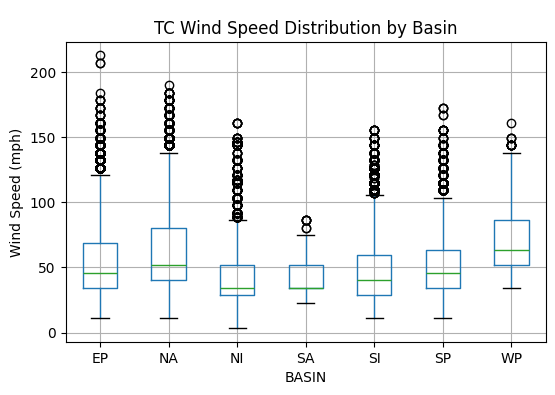

In [15]:
# (d.)

# Box plot for wind speeds grouped by basin
fig, ax = plt.subplots(figsize=(6,4))
df.boxplot('WMO_WIND', by='BASIN', ax=ax)
ax.set_title('TC Wind Speed Distribution by Basin')
ax.set_ylabel('Wind Speed (mph)')
fig.suptitle(' ')



In [16]:
# (e.)

# The WP basin appears to have the strongest storms on average given that the IQR and median are the highest of any basin. 
# Although, that basin only has a couple outliers and none more than ~160 mph, which makes me question the reliability of
# this dataset as I know that have been numerous stronger storms in that basin over the decades. Each basin seems to have
# some positive skewness, with long positive tails. The NI basin seems to have the weakest storms on average, however,
# it has many outliers on the high end, while the SA basin has a similar distribution with far fewer outliers and also
# far fewer samples. From this, it's reasonable to assume that the SA basin is the least favorable basin for storms,
# particularly strong storms. 



In [17]:
# (f.)  

# The biggest factor in the differences between these basins is the amount of area covered by favorable 
# sea surface temperatures (SSTs). The WP and NA basins have a lot of area covered by warm SSTs, hence why their distributions
# show those basins as having the strongest storms on average. The SA basin has the coldest SSTs of any basin,
# which is why it has the fewest and generally weakest storms. 



### (5) In which basin, overall (i.e., over all seasons), were the most (unique) hurricanes observed - so, the greatest # of unique SID (the storm event ID)?

In [18]:

# Group by basin and get unique storm IDs,
# then apply length function to each row of dataframe
df.groupby('BASIN')['SID'].unique().apply(len)



# Sanity check

# BASIN
# EP    1657
# NA    2344
# NI    1785
# SA       3
# SI    3061
# SP    1321
# WP    4289

BASIN
EP    1657
NA    2344
NI    1785
SA       3
SI    3061
SP    1321
WP    4289
Name: SID, dtype: int64

### (6) During which year, over all basins, were the most (unique) hurricanes observed - so, the greatest # of unique SID (the storm event ID)?
- *Optional challenge*: a plot of the number of unique hurricane events each year

In [19]:

# Groupby season and get number of unique storms,
# and call index with max number of storms
df.groupby('SEASON')['SID'].unique().apply(len).idxmax()



# Sanity check
# 1971 was the year with the most hurricanes

1971

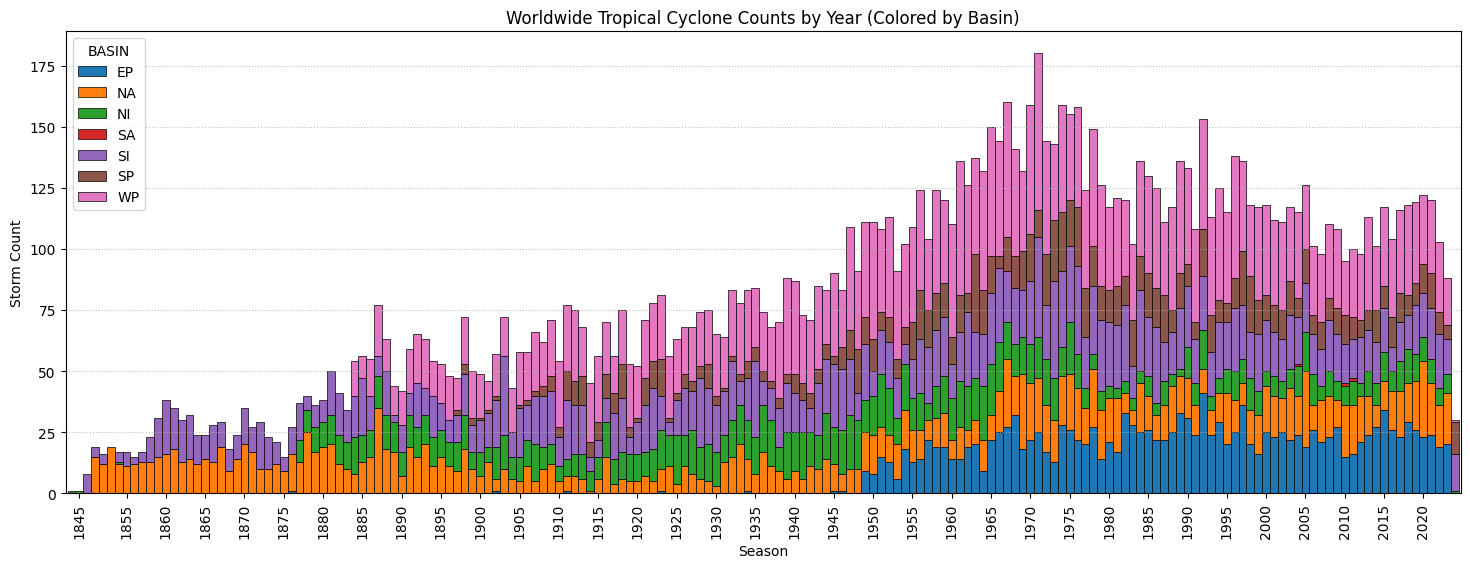

In [ ]:
# OPTIONAL CHALLENGE

storms = df.groupby(['SEASON','BASIN'])['SID'].unique().apply(len)

# Convert series to dataframe using unstack,
# with the basins as columns and seasons as indices
storms = storms.unstack("BASIN")
#print(storms)

# Plot stacked bar plot
fig, ax = plt.subplots(figsize=(18, 6))
storms.plot(kind="bar", stacked=True, ax=ax, width=1.0, linewidth=0.5, edgecolor='black')

ax.set_xlabel("Season")
ax.set_ylabel("Storm Count")
ax.set_title("Worldwide Tropical Cyclone Counts by Year (Colored by Basin)")
ax.grid(axis='y', alpha=0.8, linestyle=':')

years = storms.index.astype(int) # Extract year values
every_5 = years[years % 5 == 0] # Keep only years divisible by 5

# Set tick marks to be every 5 years
# Use get_loc to get index of year to use for tick location
ax.set_xticks([storms.index.get_loc(y) for y in every_5])
ax.set_xticklabels(every_5)

plt.show()


